In [62]:
import pandas as pd
from statsbombpy import sb
from tqdm import tqdm

In [63]:
sb.competitions()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [64]:
sb.matches(competition_id=2, season_id=27)
matches = sb.matches(competition_id=2, season_id=27)
matches.head()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2


In [65]:
all_events = []

for match_id in tqdm(matches['match_id']):
    try:
        events = sb.events(match_id=match_id)
        events['match_id'] = match_id  # keep track
        all_events.append(events)
    except Exception as e:
        print(f"Error loading match {match_id}: {e}")


  0%|          | 0/380 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  0%|          | 1/380 [00:00<04:09,  1.52it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  1%|          | 2/380 [00:01<03:57,  1.59it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  1%|          | 3/380 [00:01<03:58,  1.58it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  1%|          | 4/380 [00:02<03:51,  1.

In [66]:
pl_2016 = pd.concat(all_events, ignore_index=True)


In [67]:
print(pl_2016.columns.tolist())

['ball_receipt_outcome', 'ball_recovery_recovery_failure', 'carry_end_location', 'clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_right_foot', 'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage', 'foul_committed_card', 'foul_committed_offensive', 'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique', 'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location', 'pass_height', 'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_o

In [68]:
pl_2016.groupby('player')

In [69]:
# Basic event filtering
passes = pl_2016[pl_2016['type'] == 'Pass'].groupby('player').size().rename('passes')
completed_passes = pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_outcome'].isna())].groupby('player').size().rename('completed_passes')
shots = pl_2016[pl_2016['type'] == 'Shot'].groupby('player').size().rename('shots')
xg = pl_2016[pl_2016['type'] == 'Shot'].groupby('player')['shot_statsbomb_xg'].sum().rename('xG')
xg = round(xg, 2)
carries = pl_2016[pl_2016['type'] == 'Carry'].groupby('player').size().rename('carries')
assists_for_shots = (
    pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_shot_assist'].notna())]
    .groupby('player')
    .size()
    .rename('assists_for_shots')
)

assists_for_goals = (
    pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_goal_assist'].notna())]
    .groupby('player')
    .size()
    .rename('assists_for_goals')
)

through_balls = (
    pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_through_ball'].notna())]
    .groupby('player')
    .size()
    .rename('through_balls')
)
duels_won = (
    pl_2016[
        (pl_2016['type'] == 'Duel') &
        ((pl_2016['duel_outcome'] == 'Won') | (pl_2016['duel_outcome'] == 'Success In Play'))
    ]
    .groupby('player')
    .size()
    .rename('duels_won')
)

interceptions = (
    pl_2016[
        (pl_2016['type'] == 'Interception') &
        ((pl_2016['interception_outcome'].notna()) & (pl_2016['interception_outcome'] != 'Lost In Play'))
    ]
    .groupby('player')
    .size()
    .rename('interceptions')
)

counterpresses = (
    pl_2016[pl_2016['counterpress'] == True]
    .groupby('player')
    .size()
    .rename('counterpresses')
)

all_dribbles = (
    pl_2016[(pl_2016['type'] == 'Dribble') & (pl_2016['dribble_outcome'].notna())]
    .groupby('player')
    .size()
    .rename('all_dribbles')
)

successful_dribbles = (
    pl_2016[
        (pl_2016['type'] == 'Dribble') &
        (pl_2016['dribble_outcome'] == 'Complete')
    ]
    .groupby('player')
    .size()
    .rename('successful_dribbles')
)

header_headers = (
    pl_2016[
        (pl_2016['type'] == 'Shot') &
        (pl_2016['shot_body_part'] == 'Head')
    ]
    .groupby('player')
    .size()
    .rename('headers')
)

clearances = (
    pl_2016[pl_2016['clearance_body_part'].notna()]
    .groupby('player')
    .size()
    .rename('clearances')
)


crosses = (
    pl_2016[pl_2016['pass_cross'].notna()]
    .groupby('player')
    .size()
    .rename('crosses')
)

cut_backs = (
    pl_2016[pl_2016['pass_cut_back'].notna()]
    .groupby('player')
    .size()
    .rename('cut_backs')
)

positions = (
    pl_2016[pl_2016['position'].notna()]
    .groupby('player')['position']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .rename('position')
)

#divide carry_end_location (where data is structured as [60.4, 43.6]) into carry_end_location_x and carry_end_location_y
carries_end = pl_2016[pl_2016['carry_end_location'].notna()]
pl_2016['carry_end_location_x'] = carries_end['carry_end_location'].apply(
    lambda x: x[0] if isinstance(x, (list, tuple)) else None
)

pl_2016['carry_end_location_y'] = carries_end['carry_end_location'].apply(
    lambda x: x[1] if isinstance(x, (list, tuple)) else None
)

avg_carry_end_location_x = (
    round(pl_2016[pl_2016['carry_end_location_x'].notna()]
    .groupby('player')['carry_end_location_x']
    .mean()
    .rename('avg_carry_end_location_x'), 2)
)
avg_carry_end_location_y = (
    round(pl_2016[pl_2016['carry_end_location_y'].notna()]
    .groupby('player')['carry_end_location_y']
    .mean()
    .rename('avg_carry_end_location_y'), 2)
)

#same as carry_end_location_x and carry_end_location_y, but for pass_end_location

passes_end = pl_2016[pl_2016['pass_end_location'].notna()]
pl_2016['pass_end_location_x'] = passes_end['pass_end_location'].apply(
    lambda x: x[0] if isinstance(x, (list, tuple)) else None
)
pl_2016['pass_end_location_y'] = passes_end['pass_end_location'].apply(
    lambda x: x[1] if isinstance(x, (list, tuple)) else None
)

avg_pass_end_location_x = (
    round(pl_2016[pl_2016['pass_end_location_x'].notna()]
    .groupby('player')['pass_end_location_x']
    .mean()
    .rename('avg_pass_end_location_x'), 2)
)
avg_pass_end_location_y = (
    round(pl_2016[pl_2016['pass_end_location_y'].notna()]
    .groupby('player')['pass_end_location_y']
    .mean()
    .rename('avg_pass_end_location_y'), 2)
)

touch_location = pl_2016[pl_2016['location'].notna()]
pl_2016['touch_location_x'] = touch_location['location'].apply(
    lambda x: x[0] if isinstance(x, (list, tuple)) else None
)
pl_2016['touch_location_y'] = touch_location['location'].apply(
    lambda x: x[1] if isinstance(x, (list, tuple)) else None
)

avg_touch_location_x = (
    round(pl_2016[pl_2016['touch_location_x'].notna()]
    .groupby('player')['touch_location_x']
    .mean()
    .rename('avg_touch_location_x'), 2)
)
avg_touch_location_y = (
    round(pl_2016[pl_2016['touch_location_y'].notna()]
    .groupby('player')['touch_location_y']
    .mean()
    .rename('avg_touch_location_y'), 2)
)

pass_switch = (
    pl_2016[pl_2016['pass_switch'] == True]
    .groupby('player')
    .size()
    .rename('pass_switch')
)

avg_pass_length = (
    round(pl_2016[pl_2016['pass_length'].notna()]
    .groupby('player')['pass_length']
    .mean()
    .rename('avg_pass_length'), 2)
)

shots_after_dribbles = (
    round(pl_2016[pl_2016['shot_follows_dribble'] == True]
    .groupby('player')
    .size()
    .rename('shots_after_dribbles'), 2)
)

pass_events = pl_2016[pl_2016['type'] == 'Pass'].copy()
shot_events = pl_2016[pl_2016['type'] == 'Shot'].copy()

# Create a mapping from shot_id to xG
shot_xg_map = shot_events.set_index('id')['shot_statsbomb_xg'].dropna()

# Map xG to the pass
pass_events['xA'] = pass_events['pass_assisted_shot_id'].map(shot_xg_map)

x_assists = pass_events.groupby('player')['xA'].sum().rename('xA').round(2)








#adding minutes played
# Get substitutions only
subs = pl_2016[pl_2016['type'] == 'Substitution']

# Players subbed OFF
subbed_off = subs[['match_id', 'player', 'minute']].copy()
subbed_off['minutes_played'] = subbed_off['minute']  # played until subbed

# Players subbed ON
subbed_on = subs[['match_id', 'substitution_replacement', 'minute']].copy()
subbed_on.columns = ['match_id', 'player', 'minute']
subbed_on['minutes_played'] = 90 - subbed_on['minute']  # played from sub time to 90

# Concatenate subbed on + subbed off
sub_minutes = pd.concat([subbed_off, subbed_on])

# Other players (not subbed)
all_players = pl_2016[['match_id', 'player']].dropna().drop_duplicates()
sub_players = sub_minutes[['match_id', 'player']]
full_90_players = pd.merge(all_players, sub_players, on=['match_id', 'player'], how='left', indicator=True)
full_90_players = full_90_players[full_90_players['_merge'] == 'left_only'][['match_id', 'player']]
full_90_players['minutes_played'] = 90

# Combine everything
minutes_df = pd.concat([sub_minutes[['match_id', 'player', 'minutes_played']], full_90_players])

# Sum minutes across all matches per player
minutes_per_player = minutes_df.groupby('player')['minutes_played'].sum().rename('minutes')



full_nineties = round(minutes_per_player / 90, 1).rename('full_nineties')

pass_accuracy = round(completed_passes / passes * 100, 1).rename('pass_accuracy %')

# Merge all into a single DataFrame
newdf = pd.concat([passes, shots, xg, carries, assists_for_shots, through_balls, minutes_per_player, full_nineties, pass_accuracy, duels_won, interceptions, counterpresses, assists_for_goals, all_dribbles, successful_dribbles, header_headers, clearances, crosses, cut_backs, positions, avg_carry_end_location_x, avg_carry_end_location_y, avg_pass_end_location_x, avg_pass_end_location_y, pass_switch, avg_touch_location_x, avg_touch_location_y, x_assists, shots_after_dribbles, avg_pass_length], axis=1).fillna(0)

# Convert to integers where appropriate
for col in ['passes', 'shots', 'carries', 'assists_for_shots', 'through_balls', 'minutes', 'duels_won', 'pass_switch']:
    newdf[col] = newdf[col].astype(int)

# Reset index if you want a 'player' column instead of index
newdf = newdf.reset_index()



/var/folders/mp/l7pc43ln25l8vb_t3fc17rlm0000gn/T/ipykernel_984/1374025147.py:113: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pl_2016['carry_end_location_x'] = carries_end['carry_end_location'].apply(
/var/folders/mp/l7pc43ln25l8vb_t3fc17rlm0000gn/T/ipykernel_984/1374025147.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pl_2016['carry_end_location_y'] = carries_end['carry_end_location'].apply(
/var/folders/mp/l7pc43ln25l8vb_t3fc17rlm0000gn/T/ipykernel_984/1374025147.py:137: PerformanceWarning: DataFrame is highly fragme

In [70]:
newdf = newdf[newdf['minutes'] > 500]
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 0 to 544
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player                    385 non-null    object 
 1   passes                    385 non-null    int64  
 2   shots                     385 non-null    int64  
 3   xG                        385 non-null    float64
 4   carries                   385 non-null    int64  
 5   assists_for_shots         385 non-null    int64  
 6   through_balls             385 non-null    int64  
 7   minutes                   385 non-null    int64  
 8   full_nineties             385 non-null    float64
 9   pass_accuracy %           385 non-null    float64
 10  duels_won                 385 non-null    int64  
 11  interceptions             385 non-null    float64
 12  counterpresses            385 non-null    float64
 13  assists_for_goals         385 non-null    float64
 14  all_dribbles   

In [71]:
stats_to_per90 = [
    'player',
    'passes', 
    'shots', 'xG',
    'carries', 
    'assists_for_shots', 
    'through_balls', 
    'duels_won', 
    'interceptions', 
    'counterpresses', 
    'assists_for_goals', 
    'all_dribbles',
    'successful_dribbles',
    'headers',
    'clearances',
    'crosses',
    'cut_backs',
    'pass_switch',
    'shots_after_dribbles',
    'xA'
]
per90_stats = pd.DataFrame(columns=stats_to_per90)

for stat in stats_to_per90:
    if stat != 'player':
        per90_stats[stat] = round(newdf[stat].fillna(0) / newdf['full_nineties'], 2)
    else:
        per90_stats[stat] = newdf[stat]
    
for col in per90_stats.columns:
    if col != 'player':
        per90_stats.rename(columns={col: col + ' /90'}, inplace=True)
per90_stats = per90_stats.merge(newdf[['player', 'position', 'full_nineties', 'pass_accuracy %', 'avg_carry_end_location_x', 'avg_carry_end_location_y', 'avg_pass_end_location_x', 'avg_pass_end_location_y', 'avg_touch_location_x', 'avg_touch_location_y', 'avg_pass_length']], on='player', how='left')

per90_stats.head(10)

,player,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,...,position,full_nineties,pass_accuracy %,avg_carry_end_location_x,avg_carry_end_location_y,avg_pass_end_location_x,avg_pass_end_location_y,avg_touch_location_x,avg_touch_location_y,avg_pass_length
0,Aaron Cresswell,50.92,0.73,0.02,35.11,1.11,0.05,0.65,0.79,3.64,...,Left Back,36.8,74.8,66.12,10.68,70.66,17.09,61.13,11.45,22.15
1,Aaron Lennon,30.18,1.05,0.11,30.23,1.23,0.12,0.82,0.58,6.55,...,Right Wing,17.1,77.9,79.52,53.61,77.06,51.10,72.79,52.55,16.23
2,Aaron Ramsey,75.50,2.30,0.25,67.29,1.17,0.41,1.82,0.93,9.83,...,Left Defensive Midfield,29.1,84.4,69.07,41.29,71.23,39.70,66.32,41.10,18.35
3,Abdul Rahman Baba,57.61,0.53,0.03,40.27,0.18,0.09,2.21,1.77,5.75,...,Left Back,11.3,80.5,64.19,10.80,64.32,17.05,56.71,11.32,16.87
4,Adam David Lallana,44.70,1.79,0.17,40.51,1.88,0.51,1.67,0.60,9.02,...,Center Attacking Midfield,23.4,78.1,76.63,43.72,77.12,42.91,72.42,43.30,15.21
5,Adam Johnson,47.24,1.26,0.14,42.76,1.97,0.87,0.63,0.55,4.33,...,Right Wing,12.7,73.8,65.58,42.83,75.78,39.81,64.92,45.35,24.98
6,Adam Smith,54.68,0.64,0.02,40.60,0.60,0.04,1.80,0.77,7.21,...,Right Back,23.3,82.0,68.67,65.34,66.64,60.54,61.55,65.98,17.11
7,Adrián San Miguel del Castillo,31.19,0.00,0.00,12.66,0.00,0.00,0.00,0.00,0.00,...,Goalkeeper,32.0,55.7,13.61,41.40,58.30,44.27,9.75,40.37,51.14
8,Alan Hutton,47.57,0.42,0.02,31.08,0.89,0.08,1.20,0.85,3.51,...,Right Back,25.9,71.1,71.21,69.07,74.60,61.48,62.70,68.80,20.30
9,Alberto Moreno Pérez,61.59,1.20,0.05,40.95,1.91,0.11,1.59,1.13,6.75,...,Left Back,28.3,78.3,68.84,11.61,69.90,21.09,63.32,11.72,20.56


In [72]:
position_map = {
    'Goalkeeper': 'GK',
    
    'Left Center Back': 'CB',
    'Right Center Back': 'CB',
    
    'Left Back': 'FB',
    'Right Back': 'FB',

    'Center Defensive Midfield': 'CDM',
    'Left Defensive Midfield': 'CDM',
    'Right Defensive Midfield': 'CDM',

    'Left Center Midfield': 'CM',
    'Right Center Midfield': 'CM',

    'Center Attacking Midfield': 'AM',

    'Left Wing': 'W',
    'Right Wing': 'W',
    'Right Midfield': 'W',
    'Left Midfield': 'W',

    'Center Forward': 'ST',
    'Left Center Forward': 'ST',
    'Right Center Forward': 'ST'
}

per90_stats['position'] = per90_stats['position'].map(position_map)


In [73]:
#delete all GKs from per90_stats
per90_stats = per90_stats[per90_stats['position'] != 'GK']

In [74]:
from sklearn.preprocessing import StandardScaler

# Select only per-90 and percentage features
features = [col for col in per90_stats.columns if col.endswith('/90')] + ['pass_accuracy %', 'avg_carry_end_location_x', 'avg_carry_end_location_y', 'avg_pass_end_location_x', 'avg_pass_end_location_y', 'avg_touch_location_x', 'avg_touch_location_y', 'avg_pass_length']
X = per90_stats[features].copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [75]:
features

['passes /90',
 'shots /90',
 'xG /90',
 'carries /90',
 'assists_for_shots /90',
 'through_balls /90',
 'duels_won /90',
 'interceptions /90',
 'counterpresses /90',
 'assists_for_goals /90',
 'all_dribbles /90',
 'successful_dribbles /90',
 'headers /90',
 'clearances /90',
 'crosses /90',
 'cut_backs /90',
 'pass_switch /90',
 'shots_after_dribbles /90',
 'xA /90',
 'pass_accuracy %',
 'avg_carry_end_location_x',
 'avg_carry_end_location_y',
 'avg_pass_end_location_x',
 'avg_pass_end_location_y',
 'avg_touch_location_x',
 'avg_touch_location_y',
 'avg_pass_length']

In [76]:
import umap.umap_ as umap

# UMAP works on scaled data
reducer = umap.UMAP(n_neighbors=30, min_dist=0.05, random_state=42)
embedding = reducer.fit_transform(X_scaled)

# Add UMAP coordinates to the DataFrame
per90_stats['umap_x'] = embedding[:, 0]
per90_stats['umap_y'] = embedding[:, 1]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


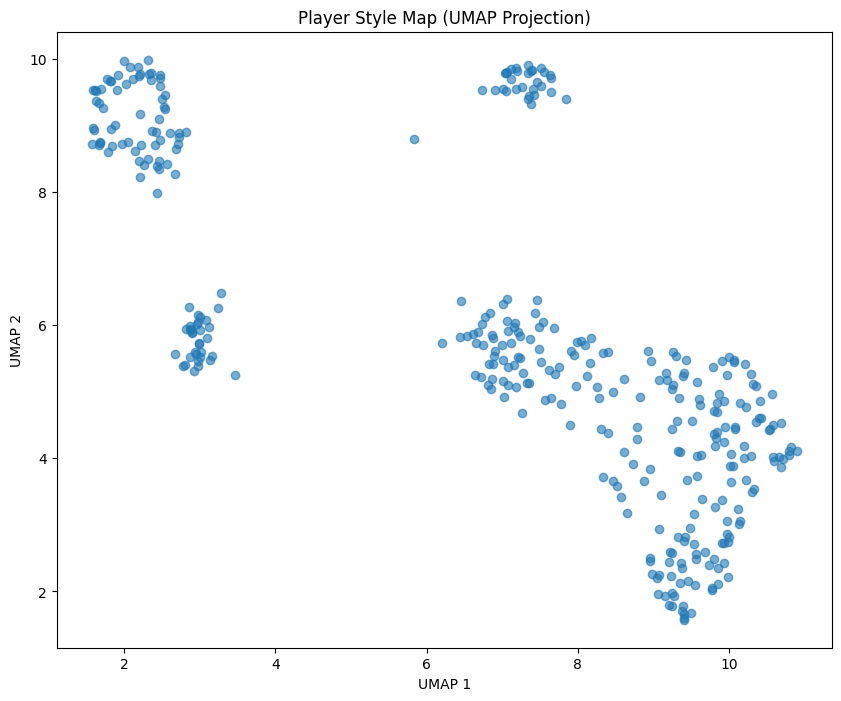

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(per90_stats['umap_x'], per90_stats['umap_y'], alpha=0.6)
plt.title('Player Style Map (UMAP Projection)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


In [78]:
from sklearn.mixture import GaussianMixture

gmm_level1 = GaussianMixture(n_components=7, random_state=42)
level1_clusters = gmm_level1.fit_predict(X_scaled)

per90_stats['main_cluster'] = level1_clusters
per90_stats['sub_cluster'] = 0
per90_stats['role'] = 0

cluster_counter = 0
for main_cluster_id in range(7):
    cluster_mask = level1_clusters == main_cluster_id
    cluster_data = X_scaled[cluster_mask]
    
    if len(cluster_data) > 1:
        gmm_level2 = GaussianMixture(n_components=2, random_state=42)
        sub_clusters = gmm_level2.fit_predict(cluster_data)
        
        per90_stats.loc[cluster_mask, 'sub_cluster'] = sub_clusters
        
        for sub_id in range(2):
            sub_mask = cluster_mask & (per90_stats['sub_cluster'] == sub_id)
            per90_stats.loc[sub_mask, 'role'] = cluster_counter
            cluster_counter += 1
    else:
        per90_stats.loc[cluster_mask, 'role'] = cluster_counter
        cluster_counter += 1


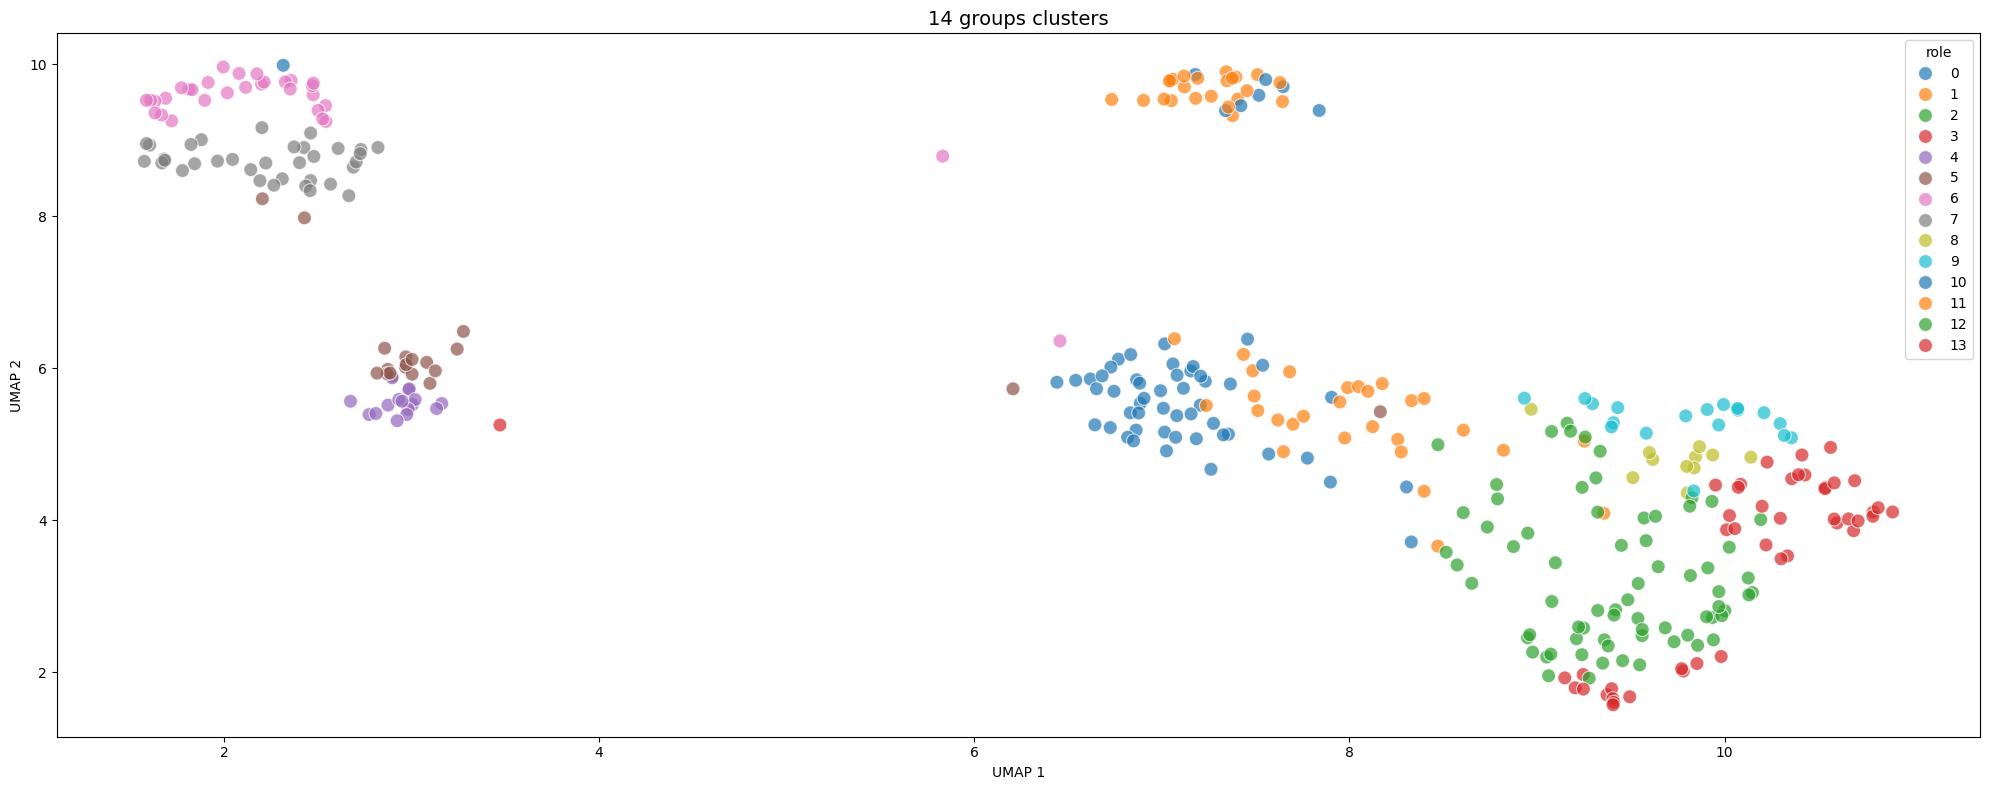

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(1, 1, figsize=(20, 8))

sns.scatterplot(
    data=per90_stats,
    x='umap_x',
    y='umap_y',
    hue='role',
    palette='tab10',
    alpha=0.7,
    s=100,
    ax=ax1
)

ax1.set_title('14 groups clusters', fontsize=14)
ax1.set_xlabel('UMAP 1')
ax1.set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()


In [80]:
print("=== Main clusters statistics ===")
main_cluster_summary = per90_stats.groupby('main_cluster')[features].mean().round(2)
display(main_cluster_summary)

print("\n=== Role statistics ===")
role_summary = per90_stats.groupby('role')[features].mean().round(2)
display(role_summary)

print("\n=== Analysis of differences between sub-clusters ===")
for main_cluster in range(7):
    subset = per90_stats[per90_stats['main_cluster'] == main_cluster]
    roles_in_cluster = sorted(subset['role'].unique())
    
    if len(roles_in_cluster) > 1:
        print(f"\nMain cluster {main_cluster} (roles {roles_in_cluster[0]} and {roles_in_cluster[1]}):")
        
        role1_stats = subset[subset['role'] == roles_in_cluster[0]][features].mean()
        role2_stats = subset[subset['role'] == roles_in_cluster[1]][features].mean()
        
        diff = abs(role1_stats - role2_stats).sort_values(ascending=False)
        print(f"  Top 3 differences:")
        for i, (feature, diff_val) in enumerate(diff.head(3).items()):
            val1 = role1_stats[feature]
            val2 = role2_stats[feature]
            print(f"    {i+1}. {feature}: {val1:.2f} vs {val2:.2f} (difference: {diff_val:.2f})")
    else:
        print(f"\nMain cluster {main_cluster}: only one role {roles_in_cluster[0]}")


=== Main clusters statistics ===


,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,assists_for_goals /90,...,shots_after_dribbles /90,xA /90,pass_accuracy %,avg_carry_end_location_x,avg_carry_end_location_y,avg_pass_end_location_x,avg_pass_end_location_y,avg_touch_location_x,avg_touch_location_y,avg_pass_length
main_cluster,,,,,,,,,,,,,,,,,,,,,
0,54.18,0.98,0.07,42.01,0.77,0.24,1.78,1.20,8.17,0.05,...,0.0,0.06,82.09,62.42,40.04,66.50,39.81,59.00,40.01,19.91
1,27.86,2.57,0.35,25.71,0.88,0.17,0.62,0.30,4.92,0.10,...,0.0,0.10,71.95,79.56,40.32,76.68,40.57,77.81,40.31,14.91
2,52.06,0.53,0.03,33.32,0.56,0.09,1.35,0.92,5.14,0.05,...,0.0,0.06,74.45,65.60,65.35,69.58,59.42,59.38,64.93,20.13
3,40.33,0.49,0.05,26.73,0.14,0.06,0.92,1.12,3.33,0.01,...,0.0,0.01,80.36,44.79,40.24,54.32,39.69,41.43,40.16,23.77
4,57.21,2.15,0.20,51.38,2.10,0.70,1.01,0.62,6.42,0.30,...,0.0,0.25,77.12,76.06,41.02,79.21,40.50,73.04,41.36,18.91
5,53.53,0.61,0.03,34.75,0.73,0.08,1.19,1.19,4.82,0.08,...,0.0,0.07,74.71,64.50,12.86,68.34,19.60,58.38,13.73,20.19
6,39.33,1.96,0.16,38.60,1.27,0.24,0.99,0.70,6.06,0.11,...,0.0,0.14,73.40,77.19,37.41,78.09,38.52,72.57,37.47,18.24



=== Role statistics ===


,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,assists_for_goals /90,...,shots_after_dribbles /90,xA /90,pass_accuracy %,avg_carry_end_location_x,avg_carry_end_location_y,avg_pass_end_location_x,avg_pass_end_location_y,avg_touch_location_x,avg_touch_location_y,avg_pass_length
role,,,,,,,,,,,,,,,,,,,,,
0,51.88,0.83,0.06,40.02,0.64,0.21,2.03,1.38,8.58,0.04,...,0.00,0.05,82.50,61.14,40.18,64.81,39.83,57.48,40.08,19.43
1,58.51,1.28,0.10,45.77,1.01,0.30,1.31,0.85,7.39,0.06,...,0.00,0.08,81.31,64.83,39.78,69.67,39.77,61.88,39.89,20.82
2,27.68,2.34,0.32,26.72,0.88,0.14,0.62,0.33,5.15,0.09,...,0.00,0.09,73.09,79.43,40.45,76.60,40.52,77.41,40.45,15.07
3,28.43,3.31,0.46,22.44,0.87,0.24,0.60,0.21,4.18,0.13,...,0.01,0.10,68.31,79.96,39.93,76.92,40.75,79.10,39.88,14.39
4,60.26,0.50,0.02,41.02,0.65,0.12,1.45,0.98,5.44,0.09,...,0.00,0.08,78.51,67.33,67.29,69.08,60.47,61.42,66.98,19.18
5,45.50,0.55,0.04,27.16,0.49,0.07,1.27,0.87,4.90,0.02,...,0.00,0.05,71.20,64.21,63.80,69.97,58.58,57.76,63.28,20.89
6,39.99,0.43,0.05,25.86,0.13,0.06,0.87,1.15,3.28,0.01,...,0.00,0.01,79.92,44.54,27.67,54.21,31.39,41.09,29.12,23.63
7,40.65,0.54,0.05,27.53,0.15,0.05,0.98,1.10,3.37,0.01,...,0.00,0.01,80.77,45.02,51.71,54.43,47.25,41.74,50.23,23.90
8,51.77,2.85,0.29,50.04,1.72,0.66,1.24,0.64,7.32,0.26,...,0.01,0.23,78.72,76.46,37.53,77.59,38.57,73.10,37.74,17.38



=== Analysis of differences between sub-clusters ===

Main cluster 0 (roles 0 and 1):
  Top 3 differences:
    1. passes /90: 51.88 vs 58.51 (difference: 6.63)
    2. carries /90: 40.02 vs 45.77 (difference: 5.75)
    3. avg_pass_end_location_x: 64.81 vs 69.67 (difference: 4.86)

Main cluster 1 (roles 2 and 3):
  Top 3 differences:
    1. pass_accuracy %: 73.09 vs 68.31 (difference: 4.77)
    2. carries /90: 26.72 vs 22.44 (difference: 4.28)
    3. avg_touch_location_x: 77.41 vs 79.10 (difference: 1.69)

Main cluster 2 (roles 4 and 5):
  Top 3 differences:
    1. passes /90: 60.26 vs 45.49 (difference: 14.77)
    2. carries /90: 41.02 vs 27.16 (difference: 13.86)
    3. pass_accuracy %: 78.51 vs 71.20 (difference: 7.31)

Main cluster 3 (roles 6 and 7):
  Top 3 differences:
    1. avg_carry_end_location_y: 27.67 vs 51.71 (difference: 24.05)
    2. avg_touch_location_y: 29.12 vs 50.23 (difference: 21.11)
    3. avg_pass_end_location_y: 31.39 vs 47.25 (difference: 15.87)

Main cluster 4 

In [81]:
per90_stats.loc[per90_stats['role'] == ('destroyer')].head(10)

,player,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,...,avg_pass_end_location_x,avg_pass_end_location_y,avg_touch_location_x,avg_touch_location_y,avg_pass_length,umap_x,umap_y,main_cluster,sub_cluster,role


In [82]:
"""cluster 0-1 -- cdm: 0 -- destroyer, 1 -- deep lying playmaker
2-3 -- STs (2 finisher , 3 targetman)
4-5 -- FBs: 4 -- overlapper RB, 5 -- conservative RB
6-7 -- CB: 6 -- LCB, 7 -- RCB
8-9 -- Ws/CAMs: 8 -- wide threat, 9 -- creative playmaker
10-11 -- WBs: 10 -- overlapper LB, 11 -- conservative LB
12-13 -- another CAM/W combo: 12 -- inside forward, 13 -- classic winger
"""

#based on the definitions given above, we should rename the roles of the players
per90_stats['role'] = per90_stats['role'].map({
    0: 'destroyer',
    1: 'deep lying playmaker',
    2: 'finisher',
    3: 'targetman',
    4: 'overlapper RB',
    5: 'conservative RB',
    6: 'LCB',
    7: 'RCB',
    8: 'wide threat',
    9: 'creative playmaker',
    10: 'overlapper LB',
    11: 'conservative LB',
    12: 'inside forward',
    13: 'classic winger',
})

In [83]:
serie_a_matches = sb.matches(competition_id=12, season_id=27)
serie_a_matches.head(10)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3879863,2016-05-08,15:00:00.000,Italy - Serie A,2015/2016,Atalanta,Udinese,1,1,available,...,None,37,Regular Season,Gewiss Stadium,Nicola Rizzoli,Edoardo Reja,Luigi De Canio,1.1.0,2,2
1,3879773,2016-03-06,16:00:00.000,Italy - Serie A,2015/2016,Frosinone,Udinese,2,0,available,...,None,28,Regular Season,Stadio Comunale Matusa,Nicola Rizzoli,Roberto Stellone,Stefano Colantuono,1.1.0,2,2
2,3879847,2016-04-30,18:00:00.000,Italy - Serie A,2015/2016,Udinese,Torino,1,5,available,...,None,36,Regular Season,Dacia Arena,Maurizio Mariani,Luigi De Canio,Gian Piero Ventura\t,1.1.0,2,2
3,3879862,2016-05-08,20:45:00.000,Italy - Serie A,2015/2016,Torino,Napoli,1,2,available,...,None,37,Regular Season,Stadio Olimpico Grande Torino,Antonio Damato,Gian Piero Ventura\t,Maurizio Sarri,1.1.0,2,2
4,3879817,2016-04-16,20:45:00.000,Italy - Serie A,2015/2016,Inter Milan,Napoli,2,0,available,...,None,33,Regular Season,Stadio Giuseppe Meazza,Gianluca Rocchi,Roberto Mancini,Maurizio Sarri,1.1.0,2,2
5,3879825,2016-04-17,18:00:00.000,Italy - Serie A,2015/2016,Lazio,Empoli,2,0,available,...,None,33,Regular Season,Estadio Olímpico,Angelo Cervellera,Simone Inzaghi,Marco Giampaolo,1.1.0,2,2
6,3879750,2016-02-21,16:00:00.000,Italy - Serie A,2015/2016,Atalanta,Fiorentina,2,3,available,...,None,26,Regular Season,Gewiss Stadium,Domenico Celi,Edoardo Reja,Paulo Manuel Carvalho de Sousa,1.1.0,2,2
7,3879567,2015-10-17,18:00:00.000,Italy - Serie A,2015/2016,AS Roma,Empoli,3,1,available,...,None,8,Regular Season,Estadio Olímpico,Piero Giacomelli,Rudi Garcia,Marco Giampaolo,1.1.0,2,2
8,3879785,2016-03-13,21:45:00.000,Italy - Serie A,2015/2016,Lazio,Atalanta,2,0,available,...,None,29,Regular Season,Estadio Olímpico,Marco Guida,Stefano Pioli,Edoardo Reja,1.1.0,2,2
9,3879705,2016-01-24,16:00:00.000,Italy - Serie A,2015/2016,Sassuolo,Bologna,0,2,available,...,None,21,Regular Season,MAPEI Stadium - Città del Tricolore,Angelo Cervellera,Eusebio Di Francesco,Roberto Donadoni,1.1.0,2,2


In [84]:
roma_events = []

for _, row in tqdm(serie_a_matches.iterrows(), total=len(serie_a_matches)):
    if row['home_team'] == 'AS Roma' or row['away_team'] == 'AS Roma':
        try:
            events = sb.events(match_id=row['match_id'])
            events['match_id'] = row['match_id']
            roma_events.append(events)
        except Exception as e:
            print(f"Error loading match {row['match_id']}: {e}")


  0%|          | 0/380 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  2%|▏         | 8/380 [00:00<00:24, 15.50it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  4%|▍         | 17/380 [00:01<00:22, 16.43it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  7%|▋         | 26/380 [00:01<00:22, 15.96it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  9%|▉         | 34/380 [00:02<00:21, 

In [85]:
roma = pd.concat(roma_events, ignore_index=True)
roma = roma[roma['team'] == 'AS Roma']
roma.head(10)


,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_open_goal,shot_saved_off_target,ball_recovery_offensive,goalkeeper_punched_out,injury_stoppage_in_chain,goalkeeper_shot_saved_to_post,shot_saved_to_post,shot_redirect,goalkeeper_lost_in_play,block_save_block
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
roma.groupby('player')

In [87]:
# Basic event filtering
passes = roma[roma['type'] == 'Pass'].groupby('player').size().rename('passes')
completed_passes = roma[(roma['type'] == 'Pass') & (roma['pass_outcome'].isna())].groupby('player').size().rename('completed_passes')
shots = roma[roma['type'] == 'Shot'].groupby('player').size().rename('shots')
xg = roma[roma['type'] == 'Shot'].groupby('player')['shot_statsbomb_xg'].sum().rename('xG')
xg = round(xg, 2)
carries = roma[roma['type'] == 'Carry'].groupby('player').size().rename('carries')
assists_for_shots = (
    roma[(roma['type'] == 'Pass') & (roma['pass_shot_assist'].notna())]
    .groupby('player')
    .size()
    .rename('assists_for_shots')
)

assists_for_goals = (
    roma[(roma['type'] == 'Pass') & (roma['pass_goal_assist'].notna())]
    .groupby('player')
    .size()
    .rename('assists_for_goals')
)

through_balls = (
    roma[(roma['type'] == 'Pass') & (roma['pass_through_ball'].notna())]
    .groupby('player')
    .size()
    .rename('through_balls')
)
duels_won = (
    roma[
        (roma['type'] == 'Duel') &
        ((roma['duel_outcome'] == 'Won') | (roma['duel_outcome'] == 'Success In Play'))
    ]
    .groupby('player')
    .size()
    .rename('duels_won')
)

interceptions = (
    roma[
        (roma['type'] == 'Interception') &
        ((roma['interception_outcome'].notna()) & (roma['interception_outcome'] != 'Lost In Play'))
    ]
    .groupby('player')
    .size()
    .rename('interceptions')
)

counterpresses = (
    roma[roma['counterpress'] == True]
    .groupby('player')
    .size()
    .rename('counterpresses')
)

all_dribbles = (
    roma[(roma['type'] == 'Dribble') & (roma['dribble_outcome'].notna())]
    .groupby('player')
    .size()
    .rename('all_dribbles')
)

successful_dribbles = (
    roma[
        (roma['type'] == 'Dribble') &
        (roma['dribble_outcome'] == 'Complete')
    ]
    .groupby('player')
    .size()
    .rename('successful_dribbles')
)

header_headers = (
    roma[
        (roma['type'] == 'Shot') &
        (roma['shot_body_part'] == 'Head')
    ]
    .groupby('player')
    .size()
    .rename('headers')
)

clearances = (
    roma[roma['clearance_body_part'].notna()]
    .groupby('player')
    .size()
    .rename('clearances')
)


crosses = (
    roma[roma['pass_cross'].notna()]
    .groupby('player')
    .size()
    .rename('crosses')
)

cut_backs = (
    roma[roma['pass_cut_back'].notna()]
    .groupby('player')
    .size()
    .rename('cut_backs')
)

positions = (
    roma[roma['position'].notna()]
    .groupby('player')['position']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .rename('position')
)

#divide carry_end_location (where data is structured as [60.4, 43.6]) into carry_end_location_x and carry_end_location_y
carries_end = roma[roma['carry_end_location'].notna()]
roma['carry_end_location_x'] = carries_end['carry_end_location'].apply(
    lambda x: x[0] if isinstance(x, (list, tuple)) else None
)

roma['carry_end_location_y'] = carries_end['carry_end_location'].apply(
    lambda x: x[1] if isinstance(x, (list, tuple)) else None
)

avg_carry_end_location_x = (
    round(roma[roma['carry_end_location_x'].notna()]
    .groupby('player')['carry_end_location_x']
    .mean()
    .rename('avg_carry_end_location_x'), 2)
)
avg_carry_end_location_y = (
    round(roma[roma['carry_end_location_y'].notna()]
    .groupby('player')['carry_end_location_y']
    .mean()
    .rename('avg_carry_end_location_y'), 2)
)

#same as carry_end_location_x and carry_end_location_y, but for pass_end_location

passes_end = roma[roma['pass_end_location'].notna()]
roma['pass_end_location_x'] = passes_end['pass_end_location'].apply(
    lambda x: x[0] if isinstance(x, (list, tuple)) else None
)
roma['pass_end_location_y'] = passes_end['pass_end_location'].apply(
    lambda x: x[1] if isinstance(x, (list, tuple)) else None
)

avg_pass_end_location_x = (
    round(roma[roma['pass_end_location_x'].notna()]
    .groupby('player')['pass_end_location_x']
    .mean()
    .rename('avg_pass_end_location_x'), 2)
)
avg_pass_end_location_y = (
    round(roma[roma['pass_end_location_y'].notna()]
    .groupby('player')['pass_end_location_y']
    .mean()
    .rename('avg_pass_end_location_y'), 2)
)

touch_location = roma[roma['location'].notna()]
roma['touch_location_x'] = touch_location['location'].apply(
    lambda x: x[0] if isinstance(x, (list, tuple)) else None
)
roma['touch_location_y'] = touch_location['location'].apply(
    lambda x: x[1] if isinstance(x, (list, tuple)) else None
)

avg_touch_location_x = (
    round(roma[roma['touch_location_x'].notna()]
    .groupby('player')['touch_location_x']
    .mean()
    .rename('avg_touch_location_x'), 2)
)
avg_touch_location_y = (
    round(roma[roma['touch_location_y'].notna()]
    .groupby('player')['touch_location_y']
    .mean()
    .rename('avg_touch_location_y'), 2)
)

pass_switch = (
    roma[roma['pass_switch'] == True]
    .groupby('player')
    .size()
    .rename('pass_switch')
)

avg_pass_length = (
    round(roma[roma['pass_length'].notna()]
    .groupby('player')['pass_length']
    .mean()
    .rename('avg_pass_length'), 2)
)

shots_after_dribbles = (
    round(roma[roma['shot_follows_dribble'] == True]
    .groupby('player')
    .size()
    .rename('shots_after_dribbles'), 2)
)

pass_events = roma[roma['type'] == 'Pass'].copy()
shot_events = roma[roma['type'] == 'Shot'].copy()

# Create a mapping from shot_id to xG
shot_xg_map = shot_events.set_index('id')['shot_statsbomb_xg'].dropna()

# Map xG to the pass
pass_events['xA'] = pass_events['pass_assisted_shot_id'].map(shot_xg_map)

x_assists = pass_events.groupby('player')['xA'].sum().rename('xA').round(2)








#adding minutes played
# Get substitutions only
subs = roma[roma['type'] == 'Substitution']

# Players subbed OFF
subbed_off = subs[['match_id', 'player', 'minute']].copy()
subbed_off['minutes_played'] = subbed_off['minute']  # played until subbed

# Players subbed ON
subbed_on = subs[['match_id', 'substitution_replacement', 'minute']].copy()
subbed_on.columns = ['match_id', 'player', 'minute']
subbed_on['minutes_played'] = 90 - subbed_on['minute']  # played from sub time to 90

# Concatenate subbed on + subbed off
sub_minutes = pd.concat([subbed_off, subbed_on])

# Other players (not subbed)
all_players = roma[['match_id', 'player']].dropna().drop_duplicates()
sub_players = sub_minutes[['match_id', 'player']]
full_90_players = pd.merge(all_players, sub_players, on=['match_id', 'player'], how='left', indicator=True)
full_90_players = full_90_players[full_90_players['_merge'] == 'left_only'][['match_id', 'player']]
full_90_players['minutes_played'] = 90

# Combine everything
minutes_df = pd.concat([sub_minutes[['match_id', 'player', 'minutes_played']], full_90_players])

# Sum minutes across all matches per player
minutes_per_player = minutes_df.groupby('player')['minutes_played'].sum().rename('minutes')



full_nineties = round(minutes_per_player / 90, 1).rename('full_nineties')

pass_accuracy = round(completed_passes / passes * 100, 1).rename('pass_accuracy %')

# Merge all into a single DataFrame
roma_df = pd.concat([passes, shots, xg, carries, assists_for_shots, through_balls, minutes_per_player, full_nineties, pass_accuracy, duels_won, interceptions, counterpresses, assists_for_goals, all_dribbles, successful_dribbles, header_headers, clearances, crosses, cut_backs, positions, avg_carry_end_location_x, avg_carry_end_location_y, avg_pass_end_location_x, avg_pass_end_location_y, pass_switch, avg_touch_location_x, avg_touch_location_y, x_assists, shots_after_dribbles, avg_pass_length], axis=1).fillna(0)

# Convert to integers where appropriate
for col in ['passes', 'shots', 'carries', 'assists_for_shots', 'through_balls', 'minutes', 'duels_won', 'pass_switch']:
    roma_df[col] = roma_df[col].astype(int)

# Reset index if you want a 'player' column instead of index
roma_df = roma_df.reset_index()



/var/folders/mp/l7pc43ln25l8vb_t3fc17rlm0000gn/T/ipykernel_984/3575005896.py:113: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  roma['carry_end_location_x'] = carries_end['carry_end_location'].apply(
/var/folders/mp/l7pc43ln25l8vb_t3fc17rlm0000gn/T/ipykernel_984/3575005896.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  roma['carry_end_location_y'] = carries_end['carry_end_location'].apply(
/var/folders/mp/l7pc43ln25l8vb_t3fc17rlm0000gn/T/ipykernel_984/3575005896.py:137: PerformanceWarning: DataFrame is highly fragmented. 

In [88]:
roma_df = roma_df[roma_df['minutes'] > 500]
roma_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 29
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player                    19 non-null     object 
 1   passes                    19 non-null     int64  
 2   shots                     19 non-null     int64  
 3   xG                        19 non-null     float64
 4   carries                   19 non-null     int64  
 5   assists_for_shots         19 non-null     int64  
 6   through_balls             19 non-null     int64  
 7   minutes                   19 non-null     int64  
 8   full_nineties             19 non-null     float64
 9   pass_accuracy %           19 non-null     float64
 10  duels_won                 19 non-null     int64  
 11  interceptions             19 non-null     float64
 12  counterpresses            19 non-null     float64
 13  assists_for_goals         19 non-null     float64
 14  all_dribbles     

In [89]:

stats_to_per90 = [
    'player',
    'passes', 
    'shots', 'xG',
    'carries', 
    'assists_for_shots', 
    'through_balls', 
    'duels_won', 
    'interceptions', 
    'counterpresses', 
    'assists_for_goals', 
    'all_dribbles',
    'successful_dribbles',
    'headers',
    'clearances',
    'crosses',
    'cut_backs',
    'pass_switch',
    'shots_after_dribbles',
    'xA'
]
roma_per90 = pd.DataFrame(columns=stats_to_per90)

for stat in stats_to_per90:
    if stat != 'player':
        roma_per90[stat] = round(roma_df[stat].fillna(0) / roma_df['full_nineties'], 2)
    else:
        roma_per90[stat] = roma_df[stat]
    
for col in roma_per90.columns:
    if col != 'player':
        roma_per90.rename(columns={col: col + ' /90'}, inplace=True)
roma_per90 = roma_per90.merge(roma_df[['player', 'position', 'full_nineties', 'pass_accuracy %', 'avg_carry_end_location_x', 'avg_carry_end_location_y', 'avg_pass_end_location_x', 'avg_pass_end_location_y', 'avg_touch_location_x', 'avg_touch_location_y', 'avg_pass_length']], on='player', how='left')

per90_stats.head(10)

,player,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,...,avg_pass_end_location_x,avg_pass_end_location_y,avg_touch_location_x,avg_touch_location_y,avg_pass_length,umap_x,umap_y,main_cluster,sub_cluster,role
0,Aaron Cresswell,50.92,0.73,0.02,35.11,1.11,0.05,0.65,0.79,3.64,...,70.66,17.09,61.13,11.45,22.15,7.343557,9.900232,5,1,conservative LB
1,Aaron Lennon,30.18,1.05,0.11,30.23,1.23,0.12,0.82,0.58,6.55,...,77.06,51.10,72.79,52.55,16.23,9.645774,3.391193,6,0,inside forward
2,Aaron Ramsey,75.50,2.30,0.25,67.29,1.17,0.41,1.82,0.93,9.83,...,71.23,39.70,66.32,41.10,18.35,7.974702,5.083978,0,1,deep lying playmaker
3,Abdul Rahman Baba,57.61,0.53,0.03,40.27,0.18,0.09,2.21,1.77,5.75,...,64.32,17.05,56.71,11.32,16.87,7.375988,9.324307,5,1,conservative LB
4,Adam David Lallana,44.70,1.79,0.17,40.51,1.88,0.51,1.67,0.60,9.02,...,77.12,42.91,72.42,43.30,15.21,9.844562,4.836857,4,0,wide threat
5,Adam Johnson,47.24,1.26,0.14,42.76,1.97,0.87,0.63,0.55,4.33,...,75.78,39.81,64.92,45.35,24.98,9.430154,5.483203,4,1,creative playmaker
6,Adam Smith,54.68,0.64,0.02,40.60,0.60,0.04,1.80,0.77,7.21,...,66.64,60.54,61.55,65.98,17.11,3.004131,5.522990,2,0,overlapper RB
8,Alan Hutton,47.57,0.42,0.02,31.08,0.89,0.08,1.20,0.85,3.51,...,74.60,61.48,62.70,68.80,20.30,2.873289,5.986466,2,1,conservative RB
9,Alberto Moreno Pérez,61.59,1.20,0.05,40.95,1.91,0.11,1.59,1.13,6.75,...,69.90,21.09,63.32,11.72,20.56,7.646181,9.705745,5,0,overlapper LB
10,Alberto Paloschi,27.30,2.03,0.38,22.84,0.68,0.14,0.54,0.54,8.38,...,69.81,44.55,76.13,45.71,14.43,9.483804,2.955771,1,0,finisher
